In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./data/data.csv')
df.head()

,id,branch,found,course,daynight,major,school,school_area,sex,age,...,q001,q002,q003,q004,q006,p001,p026,p029,p036,p045
0,5.0,1.0,3.0,3.0,0,1.0,1.0,1,1,26.333333,...,3.0,2.0,8.0,0,1.0,1.0,5.0,5.0,6.00,0
1,167.0,1.0,3.0,5.0,1,1.0,1.0,1,1,24.333333,...,2.0,3.0,5.0,1,3.0,1.0,5.0,5.0,2.00,0
2,187.0,1.0,3.0,3.0,0,1.0,1.0,0,1,28.500000,...,5.0,10.0,7.0,0,3.0,1.0,5.0,6.0,3.01,0
3,237.0,1.0,3.0,3.0,1,1.0,1.0,1,1,23.500000,...,4.0,2.0,7.0,0,3.0,1.0,3.0,4.0,3.00,0
4,260.0,1.0,3.0,5.0,1,1.0,1.0,0,1,24.750000,...,1.0,5.0,6.0,0,1.0,1.0,3.0,3.0,2.00,0


In [5]:
df.columns

Index(['id', 'branch', 'found', 'course', 'daynight', 'major', 'school',
       'school_area', 'sex', 'age', 'hire_state', 'b022', 'b023', 'b036',
       'b038', 'b039', 'b040', 'f009', 'i001', 'i033', 'i037', 'i042', 'i046',
       'i066', 'i076', 'l001', 'l009', 'l016', 'm002', 'k110', 'k004', 'k007',
       'k009', 'k011', 'q001', 'q002', 'q003', 'q004', 'q006', 'p001', 'p026',
       'p029', 'p036', 'p045'],
      dtype='object')

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

tree = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(df.drop('hire_state',axis=1), df['hire_state'], random_state=0)

In [7]:
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=3)   # max_depth : 가지치기 (최대 깊이 지정)
dt_clf.fit(X_train, y_train)

dt_clf.score(X_train, y_train), dt_clf.score(X_test, y_test)

(0.7688227241615332, 0.7785476007185014)

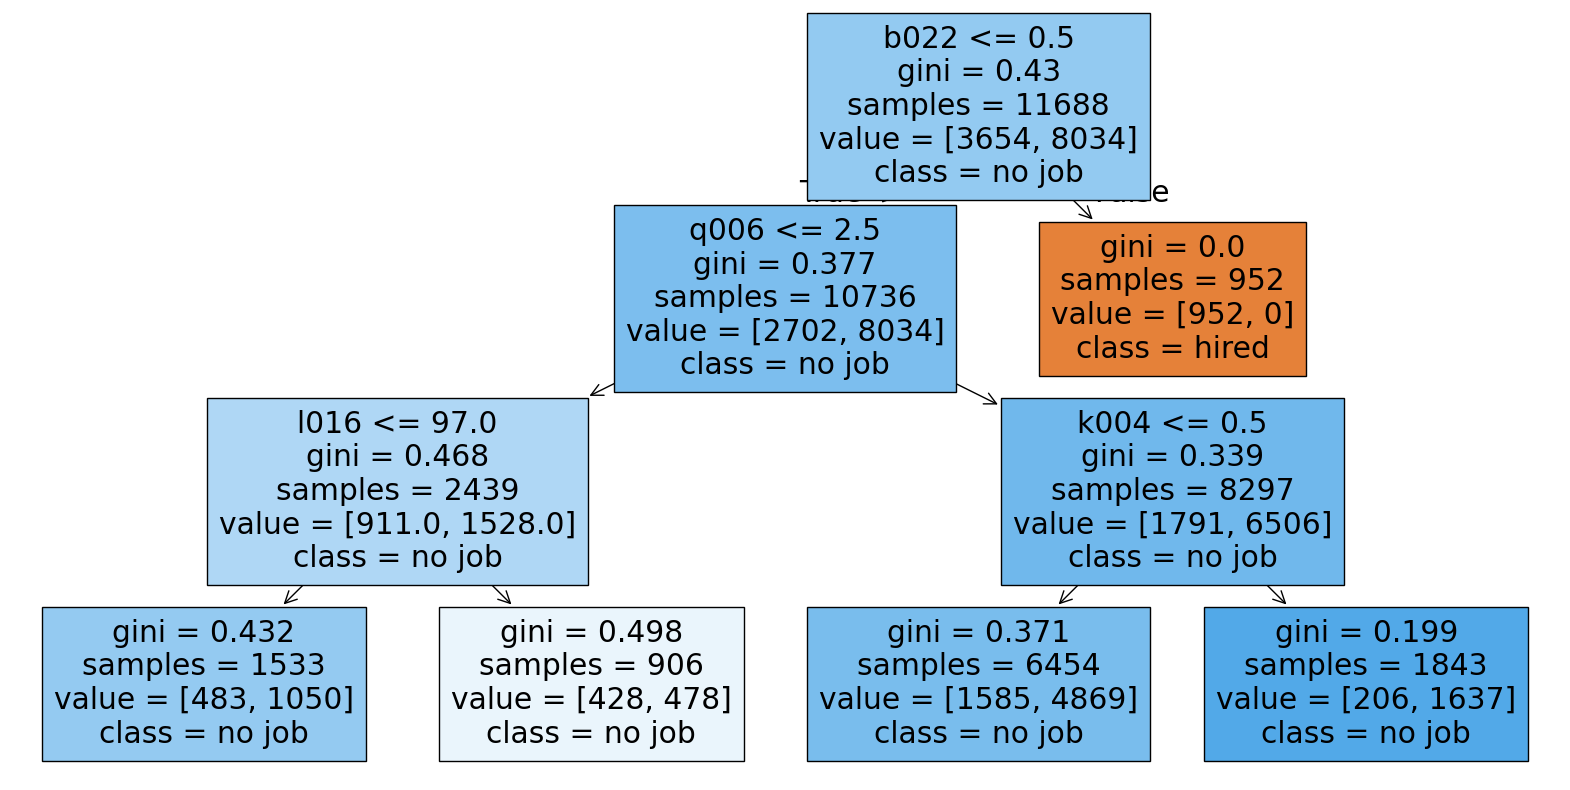

In [11]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
# plot_tree(dt_clf)
plot_tree(dt_clf, filled=True,   # 색 채우기 옵션 (특정 클래스의 비율 표현)
          feature_names=X_train.columns,    # 특성 이름 
          class_names=['hired','no job'],  # 클래스 이름
          max_depth=3 # 그림에 대하여 최대 깊이 지정
)
plt.show()